In [2]:
Image(url='https://m.economictimes.com/thumb/msid-88578906,width-1200,height-900,resizemode-4,imgsize-90660/gold.jpg', width=1000)

### 🔹 Importing important library for dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from IPython.display import Image


In [3]:
df = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\gold.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


C:\Users\ZMZM\AppData\Local\Temp\ipykernel_5080\2868900106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

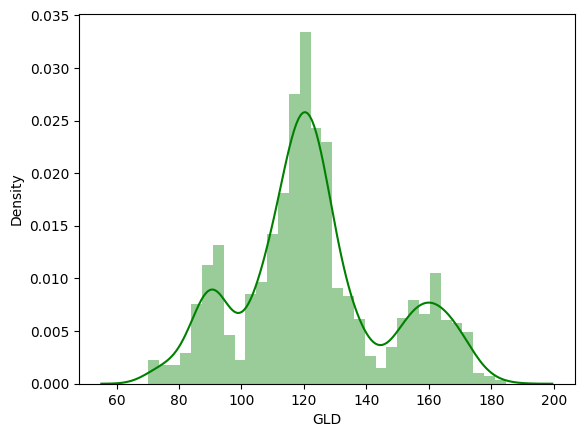

In [7]:
sns.distplot(df['GLD'], color='green')

### 🔹 Splitting data into ( test , train )

In [8]:
X = df.drop(['Date','GLD'], axis=1)
y= df['GLD']

In [9]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [10]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

## 🟢 Random Forest Regressor

In [12]:
regressor = RandomForestRegressor(n_estimators=100)

In [13]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
test_data_predection = regressor.predict(X_test)

In [15]:
test_data_predection

array([168.7753998 ,  82.25009977, 116.19720012, 127.68180088,
       120.91570087, 154.90319748, 150.48019909, 126.12590011,
       117.44059879, 126.09230069, 116.81790065, 171.30470061,
       141.43279895, 167.973099  , 115.17050004, 117.60240068,
       139.19020264, 170.21730107, 159.43820305, 158.55689992,
       155.21330055, 125.17930035, 176.36869867, 156.8929033 ,
       125.26990076,  93.63539957,  77.50649986, 120.94859976,
       119.07349919, 167.52759944,  87.99490062, 125.34239979,
        91.19910078, 117.8011001 , 121.24379907, 136.46600088,
       115.37740109, 115.14270071, 146.96089963, 107.17210119,
       104.34580251,  87.22619805, 126.45470018, 117.78840026,
       154.28729953, 119.48360017, 108.27820054, 108.0847984 ,
        93.17010013, 127.12269768,  74.95560064, 113.56239934,
       121.29230014, 111.23949907, 118.85199892, 120.15219945,
       158.18519996, 168.31230073, 146.94919612,  85.91439871,
        94.41680027,  86.84689881,  90.62210016, 119.08

In [16]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_predection)
print("R squared error: ", error_score)

R squared error:  0.9890260932450453


In [17]:
y_test = list(y_test)

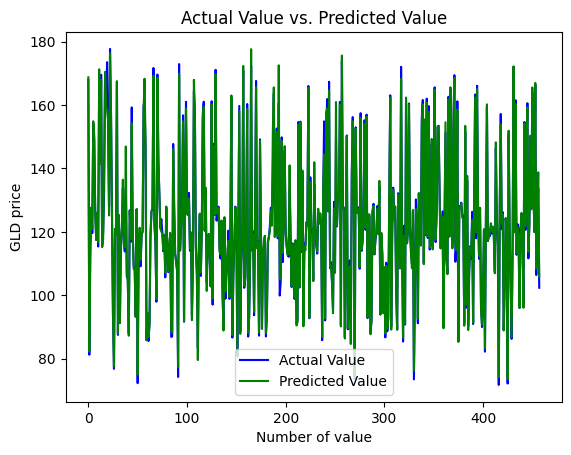

In [18]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_predection ,color='green', label='Predicted Value')
plt.title('Actual Value vs. Predicted Value')
plt.xlabel('Number of value')
plt.ylabel('GLD price')
plt.legend()
plt.show()

#

# Regards, Tariq Ibrahim